# 1. 问题描述

本次作业中，自行选择2个数据集进行探索性分析与预处理。
github仓库地址为

# 2. 数据集

选择的数据集为：Wine Reviews和Trending YouTube Video Statistics

# 3. 数据分析要求

## 数据集1：Wine Reviews

## 3.1 数据可视化和摘要

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

读取数据集，选择标称属性和数值属性

In [2]:
winemag = pd.read_csv("winemag-data_first150k.csv",delimiter=',',low_memory=False)
nominal = winemag[['country','designation','province','region_1','region_2','variety','winery']]
numeric = winemag[['points','price']]

对标称属性计算频数

In [3]:
print("country频数：\n",nominal['country'].value_counts(),"\n")
print("designation频数：\n",nominal['designation'].value_counts(),"\n")
print("province频数：\n",nominal['province'].value_counts(),"\n")
print("region_1频数：\n",nominal['region_1'].value_counts(),"\n")
print("region_2频数：\n",nominal['region_2'].value_counts(),"\n")
print("variety频数：\n",nominal['variety'].value_counts(),"\n")
print("winery频数：\n",nominal['winery'].value_counts(),"\n")

country频数：
 US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                     

对数值属性，计算5数概括和缺失值个数,用dropna()将缺失数据去除。

In [4]:
print("缺失值个数为：\n", numeric.isnull().sum())

缺失值个数为：
 points        0
price     13695
dtype: int64


In [5]:
numeric_drop = numeric.dropna().astype(int)
points = numeric_drop['points'].to_numpy()
price = numeric_drop['price'].to_numpy()
mean = np.mean(price)
mode = stats.mode(price)[0][0]
points_percentile = np.percentile(points, (0,25,50,75,100), interpolation='lower')
price_percentile = np.percentile(price, (0,25,50,75,100), interpolation='lower')
print("points的五数概括为：",points_percentile)
print("price的五数概括为：",price_percentile)

points的五数概括为： [ 80  86  88  90 100]
price的五数概括为： [   4   16   24   40 2300]


用直方图和盒图检查数值属性的分布和离群点

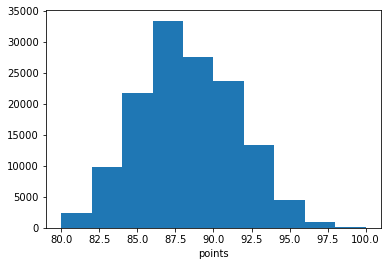

In [6]:
plt.hist(points)
plt.xlabel('points')
plt.show()

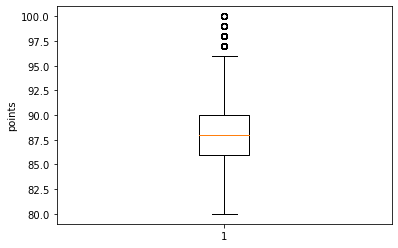

In [7]:
plt.boxplot(points)
plt.ylabel('points')
plt.show()

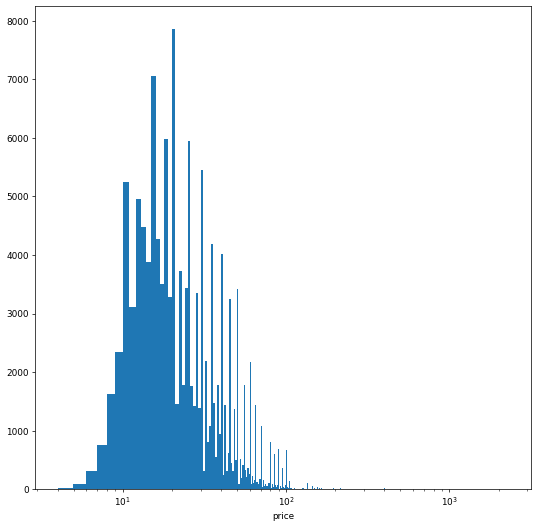

In [8]:
plt.figure(figsize=(10,10),dpi=64)
plt.hist(price,bins=2300)
plt.xscale('log')
plt.xlabel('price')
plt.show()

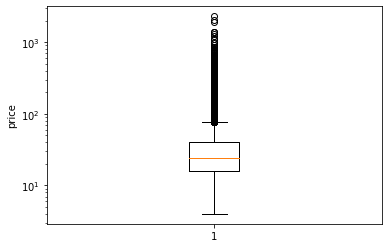

In [9]:
plt.boxplot(price)
plt.ylabel('price')
plt.yscale('log')

## 3.2 数据缺失的处理

只有price属性存在缺失值，我们用最高频率值来填补缺失值。

In [10]:
numeric_fill= numeric.fillna(mode).astype(int)
price_fill = numeric_fill['price'].to_numpy()

重新绘制出直方图和箱图

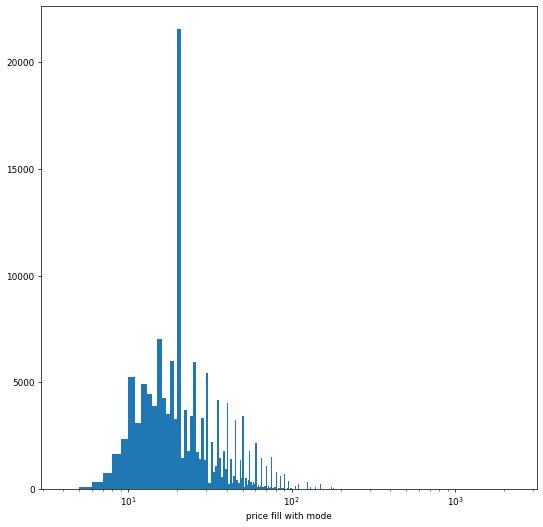

In [11]:
plt.figure(figsize=(10,10),dpi=64)
plt.hist(price_fill,bins=2300)
plt.xscale('log')
plt.xlabel('price fill with mode')
plt.show()

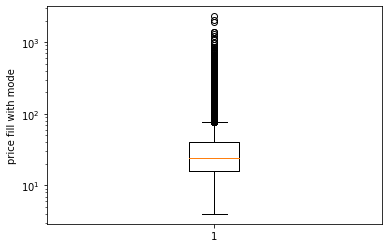

In [12]:
plt.boxplot(price)
plt.ylabel('price fill with mode')
plt.yscale('log')

第二种方法，用线性回归填补缺失值

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
numeric_nan = numeric[np.isnan(numeric['price'])]
lineR = LinearRegression()
lineR.fit(points.reshape(-1,1), price)

LinearRegression()

In [15]:
line = lineR.predict(numeric_nan['points'].to_numpy().reshape(-1,1))
numeric_nan_copy=numeric_nan.copy()
numeric_nan_copy['price']= line

In [16]:
numeric_linear = numeric_drop.append(numeric_nan_copy)
numeric_linear = numeric_linear.astype(int)
price_linear = numeric_linear['price'].to_numpy()

重新绘制出直方图和箱图

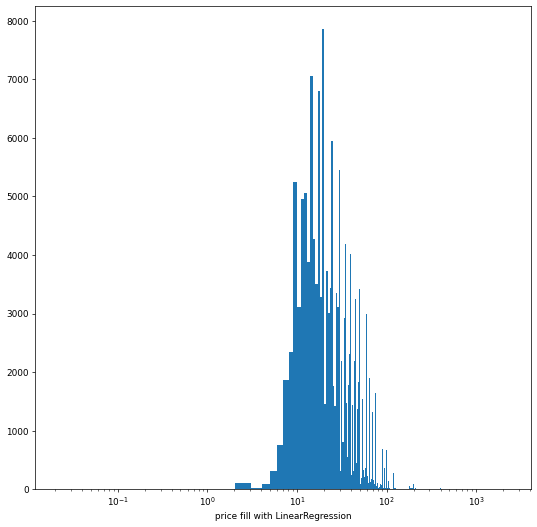

In [17]:
plt.figure(figsize=(10,10),dpi=64)
plt.hist(price_linear,bins=2300)
plt.xscale('log')
plt.xlabel('price fill with LinearRegression')
plt.show()

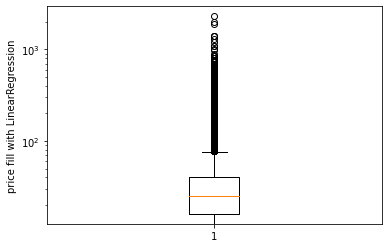

In [18]:
plt.boxplot(price_linear)
plt.ylabel('price fill with LinearRegression')
plt.yscale('log')

第三种方法，用KNN填补缺失值

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
clf = KNeighborsRegressor(n_neighbors = 10, weights = "distance")
clf.fit(points.reshape(-1,1), price)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [21]:
knn = clf.predict(numeric_nan['points'].to_numpy().reshape(-1,1))
numeric_nan_copy=numeric_nan.copy()
numeric_nan_copy['price']= knn

In [22]:
numeric_knn = numeric_drop.append(numeric_nan_copy)
numeric_knn = numeric_knn.astype(int)
price_knn = numeric_knn['price'].to_numpy()

重新绘制出直方图和箱图

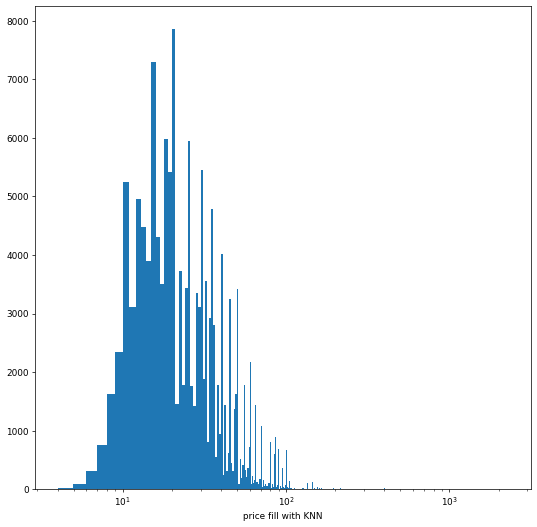

In [23]:
plt.figure(figsize=(10,10),dpi=64)
plt.hist(price_knn,bins=2300)
plt.xscale('log')
plt.xlabel('price fill with KNN')
plt.show()

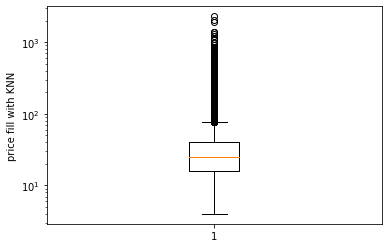

In [24]:
plt.boxplot(price_knn)
plt.ylabel('price fill with KNN')
plt.yscale('log')

## 数据集2 Trending YouTube Video Statistics

## 3.1 数据可视化和摘要

读取数据，并查看有多少属性

In [25]:
ca_youtube = pd.read_csv("CAvideos.csv",delimiter=',',low_memory=False)
print(ca_youtube.nunique())

video_id                  24427
trending_date               205
title                     24573
channel_title              5076
category_id                  17
publish_time              23613
tags                      20157
views                     40170
likes                     24676
dislikes                   6241
comment_count             11172
thumbnail_link            24422
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               22345
dtype: int64


我们划分出标称属性和数值属性

In [26]:
nominal = ca_youtube[['trending_date','category_id','tags','comments_disabled','ratings_disabled','video_error_or_removed']]
numeric = ca_youtube[['views','likes','dislikes','comment_count']].astype(int)

对每一个标称属性计算频数

In [27]:
print("trending_date频数：\n",nominal['trending_date'].value_counts(),"\n")
print("category_id频数：\n",nominal['category_id'].value_counts(),"\n")
print("tags频数：\n",nominal['tags'].value_counts(),"\n")
print("comments_disabled频数：\n",nominal['comments_disabled'].value_counts(),"\n")
print("ratings_disabled频数：\n",nominal['ratings_disabled'].value_counts(),"\n")
print("video_error_or_removed频数：\n",nominal['video_error_or_removed'].value_counts(),"\n")

trending_date频数：
 18.02.04    200
17.25.12    200
18.16.03    200
17.30.11    200
18.19.02    200
           ... 
18.13.02    195
18.02.02    195
18.31.01    191
18.01.02    190
18.14.05    171
Name: trending_date, Length: 205, dtype: int64 

category_id频数：
 24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64 

tags频数：
 [none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

对数值属性，计算5数概括，并查询缺失值

In [28]:
views = numeric['views'].to_numpy()
likes = numeric['likes'].to_numpy()
dislikes = numeric['dislikes'].to_numpy()
comment_count = numeric['comment_count'].to_numpy()

In [29]:
views_percentile = np.percentile(views, (0,25,50,75,100), interpolation='lower')
likes_percentile = np.percentile(likes, (0,25,50,75,100), interpolation='lower')
dislikes_percentile = np.percentile(dislikes, (0,25,50,75,100), interpolation='lower')
comment_count_percentile = np.percentile(comment_count, (0,25,50,75,100), interpolation='lower')
print("views的五数概括为：",views_percentile)
print("likes的五数概括为：",likes_percentile)
print("dislikes的五数概括为：",dislikes_percentile)
print("comment_count的五数概括为：",comment_count_percentile)

views的五数概括为： [      733    143902    371204    963302 137843120]
likes的五数概括为： [      0    2191    8780   28717 5053338]
dislikes的五数概括为： [      0      99     303     950 1602383]
comment_count的五数概括为： [      0     417    1301    3713 1114800]


In [30]:
print("缺失值个数为：\n", numeric.isnull().sum())

缺失值个数为：
 views            0
likes            0
dislikes         0
comment_count    0
dtype: int64


我们可以发现，本数据集的数值属性没有缺失值，因此不需要数据填补。

可视化

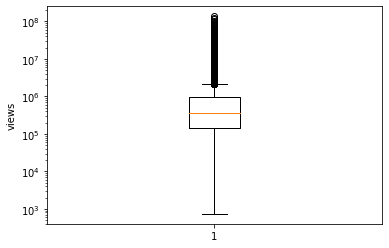

In [31]:
plt.boxplot(numeric['views'])
plt.ylabel('views')
plt.yscale('log')

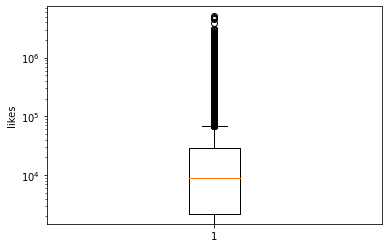

In [32]:
plt.boxplot(numeric['likes'])
plt.ylabel('likes')
plt.yscale('log')

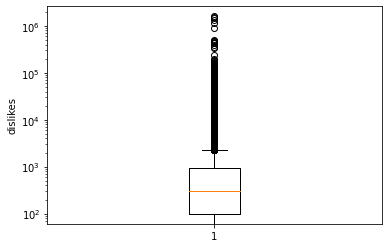

In [33]:
plt.boxplot(numeric['dislikes'])
plt.ylabel('dislikes')
plt.yscale('log')

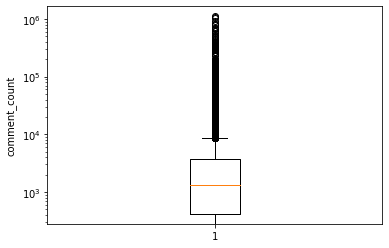

In [34]:
plt.boxplot(numeric['comment_count'])
plt.ylabel('comment_count')
plt.yscale('log')